In [32]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 985 kB/s 


In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
import category_encoders as ce
# Alternative : from sklearn.preprocessing import CategoricalEncoder as ce
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

import graphviz

import warnings
warnings.filterwarnings('ignore')

In [34]:
data = 'play-tennis.csv'
df = pd.read_csv(data)
df.shape

(10, 5)

In [35]:
df.head()

,1,2,3,4,choice
0,D01,Overcast,35,Strong,No
1,D02,Sunny,25,Weak,Yes
2,D03,Sunny,25,Strong,No
3,D04,Overcast,25,Weak,Yes
4,D05,Rain,25,Strong,No


In [36]:
# Rename column names / title

col_names = ['Day', 'Outlook', 'Temperature', 'Wind', 'Play Tennis?']

df.columns = col_names

col_names

['Day', 'Outlook', 'Temperature', 'Wind', 'Play Tennis?']

In [37]:
df.head()

,Day,Outlook,Temperature,Wind,Play Tennis?
0,D01,Overcast,35,Strong,No
1,D02,Sunny,25,Weak,Yes
2,D03,Sunny,25,Strong,No
3,D04,Overcast,25,Weak,Yes
4,D05,Rain,25,Strong,No


In [38]:
# View summary for dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Day           10 non-null     object
 1   Outlook       10 non-null     object
 2   Temperature   10 non-null     int64 
 3   Wind          10 non-null     object
 4   Play Tennis?  10 non-null     object
dtypes: int64(1), object(4)
memory usage: 528.0+ bytes


In [39]:
# Check frequency of variables

col_names = ['Day', 'Outlook', 'Temperature', 'Wind', 'Play Tennis?']

for col in col_names:
    print(df[col].value_counts())  

D01    1
D02    1
D03    1
D04    1
D05    1
D06    1
D07    1
D08    1
D09    1
D10    1
Name: Day, dtype: int64
Overcast    4
Sunny       3
Rain        3
Name: Outlook, dtype: int64
25    6
35    2
30    2
Name: Temperature, dtype: int64
Weak      6
Strong    4
Name: Wind, dtype: int64
No     7
Yes    3
Name: Play Tennis?, dtype: int64


In [40]:
# Explore classes, in this case, 'Play Tennis?'

df['Play Tennis?'].value_counts()

No     7
Yes    3
Name: Play Tennis?, dtype: int64

In [41]:
# Explore class 'Outlook'

df['Outlook'].value_counts()

Overcast    4
Sunny       3
Rain        3
Name: Outlook, dtype: int64

In [42]:
# Check for missing variables

df.isnull().sum()

Day             0
Outlook         0
Temperature     0
Wind            0
Play Tennis?    0
dtype: int64

In [43]:
# Declare vector and target variable

X = df.drop(['Temperature'], axis=1)

y = df['Temperature']

In [44]:
# Split dataset for training and testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [45]:
# Check shapes from both sets

X_train.shape, X_test.shape

((6, 4), (4, 4))

In [46]:
# check data types in training set

X_train.dtypes

Day             object
Outlook         object
Wind            object
Play Tennis?    object
dtype: object

In [47]:
# check data types in testing set

X_test.dtypes

Day             object
Outlook         object
Wind            object
Play Tennis?    object
dtype: object

In [49]:
X_train.head()

,Day,Outlook,Wind,Play Tennis?
7,D08,Rain,Weak,No
2,D03,Sunny,Strong,No
9,D10,Overcast,Strong,Yes
4,D05,Rain,Strong,No
3,D04,Overcast,Weak,Yes


In [51]:
# Encode training and testing sets to machine-readable numeric

encoder = ce.OrdinalEncoder(cols=['Day', 'Outlook', 'Wind', 'Play Tennis?'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [52]:
X_train.head()

,Day,Outlook,Wind,Play Tennis?
7,1,1,1,1
2,2,2,2,1
9,3,3,2,2
4,4,1,2,1
3,5,3,1,2


In [53]:
X_test.head()

,Day,Outlook,Wind,Play Tennis?
8,-1.0,2,1,1
1,-1.0,2,1,2
5,-1.0,1,1,1
0,-1.0,3,2,1


In [54]:
# DecisionTreeClassifier with criterion GINI index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [55]:
# Predict results

y_pred_gini = clf_gini.predict(X_test)

In [56]:
# Start of comparison between training and testing sets for accuracy score

print('Accuracy score : Testing:- {0:0.4f}'.format(accuracy_score(y_test, y_pred_gini)))

Accuracy score : Testing:- 0.2500


In [57]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array([25, 25, 25, 25, 25, 35])

In [58]:
print('Accuracy score : Training:- {0:0.4f}'.format(accuracy_score(y_train, y_pred_train_gini)))

# End of comparison between training and testing sets for accuracy score


Accuracy score : Training:- 1.0000


In [59]:
# Check over/underfitting

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.2500


[Text(0.5, 0.75, 'X[0] <= 5.5\ngini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

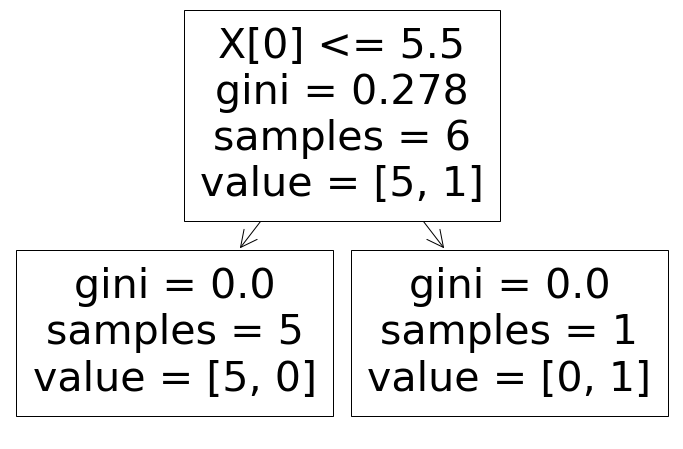

In [60]:
# Visualize decision-tree(s) : normal

plt.figure(figsize=(12,8))

tree.plot_tree(clf_gini.fit(X_train, y_train))